In [1]:
import tensorflow as tf

from neuro.nn import activation, layer, losses, models, optimizer


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.one_hot(y_train, 10)

In [3]:
def GetModel():
    return models.Sequential(
        layer.Flatten(),
        layer.Dense(28 * 28, 512),
        activation.ReLU(),
        layer.Dropout(0.25),
        layer.Dense(512, 128),
        activation.ReLU(),
        layer.Dense(128, 16),
        activation.ReLU(),
        layer.Dense(16, 10),
        activation.Softmax(),
    )


In [4]:
loss = losses.CategoricalCrossentropy()
optimizers = [
    optimizer.SGD(lr=0.01),
    optimizer.AdaGrad(),
    optimizer.RMSProp(),
    optimizer.Adam(),
]


In [5]:
loss_history = {
    "SGD": [],
    "AdaGrad": [],
    "RMSProp": [],
    "Adam": [],
}

In [6]:
current_optimizer = None
epochs = 50
for optim in optimizers:
    model = GetModel()
    if isinstance(optim, optimizer.SGD):
        print("Optimizer: SGD")
        current_optimizer = "SGD"
    elif isinstance(optim, optimizer.AdaGrad):
        print("Optimizer: AdaGrad")
        current_optimizer = "AdaGrad"
    elif isinstance(optim, optimizer.RMSProp):
        print("Optimizer: RMSProp")
        current_optimizer = "RMSProp"
    elif isinstance(optim, optimizer.Adam):
        print("Optimizer: Adam")
        current_optimizer = "Adam"

    for i in range(1, epochs + 1):
        # Forward Propagation
        y_pred = model(x_train)

        # Calculation of Loss
        train_loss = loss(y_pred, y_train).numpy()
        if i % 10 == 0:
            print(f"Epoch: {i}, Loss: {train_loss}")

        loss_history[current_optimizer].append(train_loss)

        # Back Propagation + Optimizing
        optim(model, loss)


Optimizer: SGD
Epoch: 10, Loss: 2.3026459217071533
Epoch: 20, Loss: 2.3026328086853027
Epoch: 30, Loss: 2.302631139755249
Epoch: 40, Loss: 2.3026323318481445
Epoch: 50, Loss: 2.302629232406616
Optimizer: AdaGrad
Epoch: 10, Loss: 2.2460250854492188
Epoch: 20, Loss: 2.077514410018921
Epoch: 30, Loss: 1.8813276290893555
Epoch: 40, Loss: 1.69989812374115
Epoch: 50, Loss: 1.543122410774231
Optimizer: RMSProp
Epoch: 10, Loss: 2.0093533992767334
Epoch: 20, Loss: 1.3697607517242432
Epoch: 30, Loss: 1.0304501056671143
Epoch: 40, Loss: 0.8655622005462646
Epoch: 50, Loss: 0.8677550554275513
Optimizer: Adam
Epoch: 10, Loss: 2.110738754272461
Epoch: 20, Loss: 1.1138684749603271
Epoch: 30, Loss: 0.7278380393981934
Epoch: 40, Loss: 0.5675658583641052
Epoch: 50, Loss: 0.48110365867614746


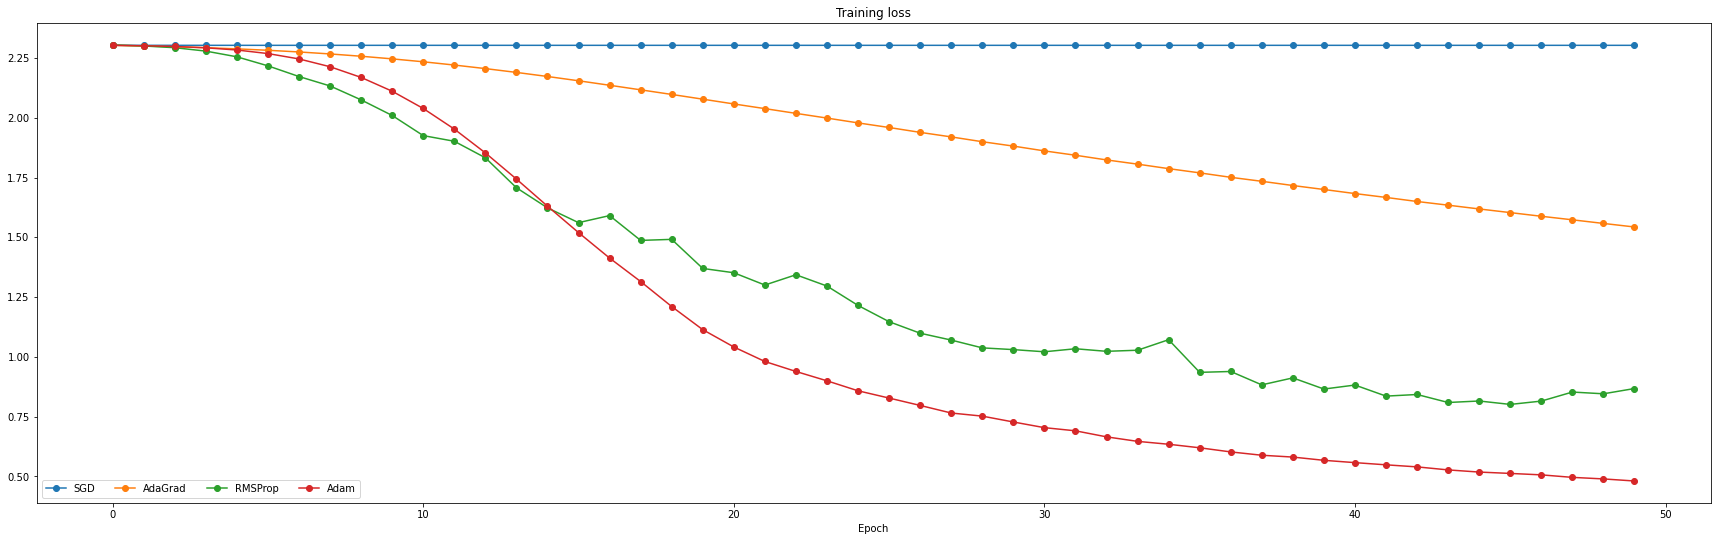

In [7]:
from matplotlib import pyplot as plt

plt.subplot(3, 1, 1)
plt.title("Training loss")
plt.xlabel("Epoch")

for optim, loss_hist in loss_history.items():
    plt.subplot(3, 1, 1)
    plt.plot(loss_hist, "-o", label=optim)


plt.subplot(3, 1, 1)
plt.legend(loc="lower left", ncol=4)
plt.gcf().set_size_inches(30, 30)
plt.show()
